# Group analysis on searchlight maps from the FaceWord experiment

In the FaceWord experiment, participants looked at words and faces while undergoing fMRI.
Participants are presented with a word, which they would try to use to predict the emotion of an upcoming emoji (happy/fearful). Their task was to respond with a button press to indicate which type of emoji was presented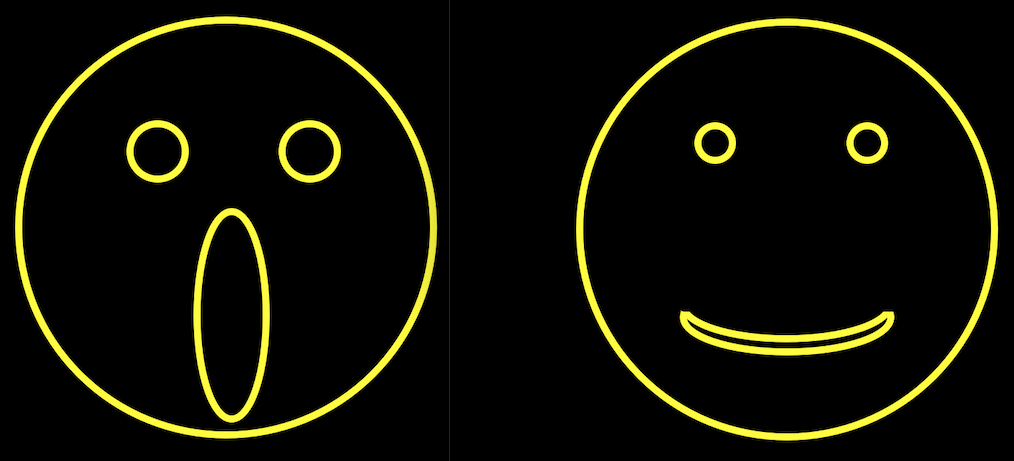

21 cognitive science students participated in the experiment over the course of several years (2019-202 as part of courses in cognitive neuroscience at Aarhus University3).

The experiment consisted of 6 sessions with 60 WordFace trials in ea (30 positive, 30 negative)ch. Each session lasted 10 minutes.

Each fMRI volume consisted of 45 slices (voxel-size: 2.53x2.53x3mm). Data was acquired with a TR=1s (1H, yielding a total of 600 images per sessionz The raw data can be found in the fMRI-data folder.

All data was preprocessed using fMRIprep.).

In this analysis, we have modelled the onsset foeverych positive and negative emojas an individual column in the design matrix, using the Glover HRF. The design matrix includes 22 nuisance variables and a cosine set for highpass filtering 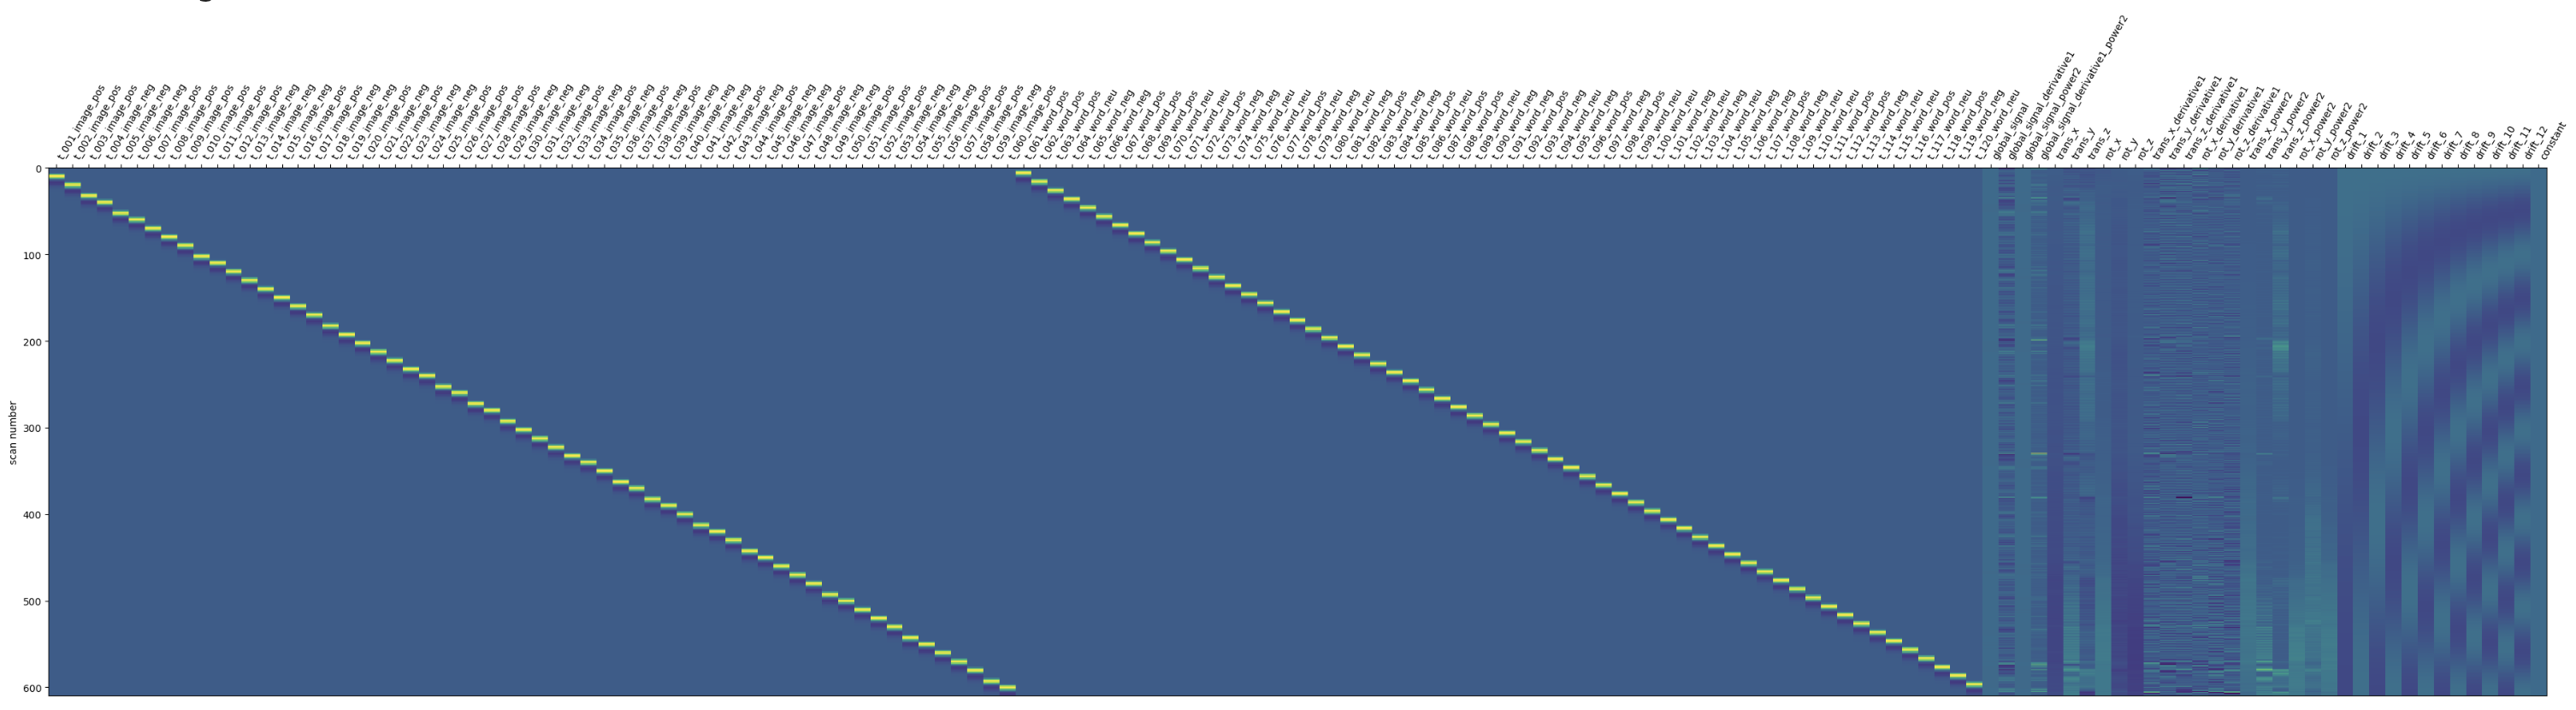

O our aim is to see if there is a difference between the t types of emojisz

To this end, we have conducted a searchlight analysis on 80% of the 360 trials. We now take the accuracy image for each participant and subject them to a 2nd level t-test.

#### Tasks and questions for assignment 5 are written at the bottom of the notebook.



<div class="alert alert-success" role="alert">

# Preamble: Activate environment
In the first notebook, we installed a python environment. If you haven't don so, please go back to the ```01_setup_virtual_environment.ipynb``` and complete this before proceeding.

If you closed/stopped the UCloud run between then and now, we will need to reactivate the environment.

For this we use a bash script with a subset of the lines we used for setting up the environment

The script called ```activate.sh``` This should be located in your working directory. If not, save the following in a file with this filename.

```bash
. /work/<MY DIRECTORY NUMBER>/virt_env/bin/activate
python -m ipykernel install --user --name=virt_env
echo Done! Remember changing the kernel in Jupyter.
```
</div>

In [33]:
# import os
# path='/work/798873' # Remember to change this to your own path
# os.chdir(path)
# !./activate.sh


<div class="alert alert-success" role="alert">
    
### Check that we are in the right environment

</div>

In [ ]:
import sys
print(sys.executable)

# Check that we have something installed.
import nilearn

In [35]:
# Additional imports
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas as pd
import nilearn
import sklearn

### Let's load the faceWord searchlight data from one participant

In [36]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

f = open("/work/fMRI_data/FaceWordData/WordFace_searchlight_1.pkl", 'rb')
searchlight = pickle.load(f)
f.close()
print(searchlight)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 19:38:21
SearchLight(cv=10, estimator=LinearSVC(dual='auto', max_iter=2000),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f639b4b3b50>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f639b4b3bb0>,
            radius=5, verbose=10)
Finishing cell: 19:38:21


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Plotting searchlight from one participant

Starting cell: 19:38:21
(193, 235, 198)


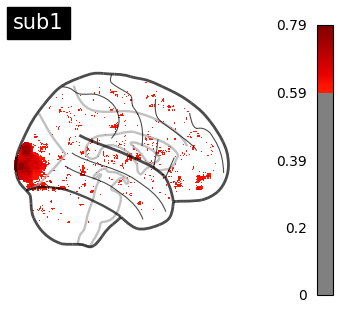

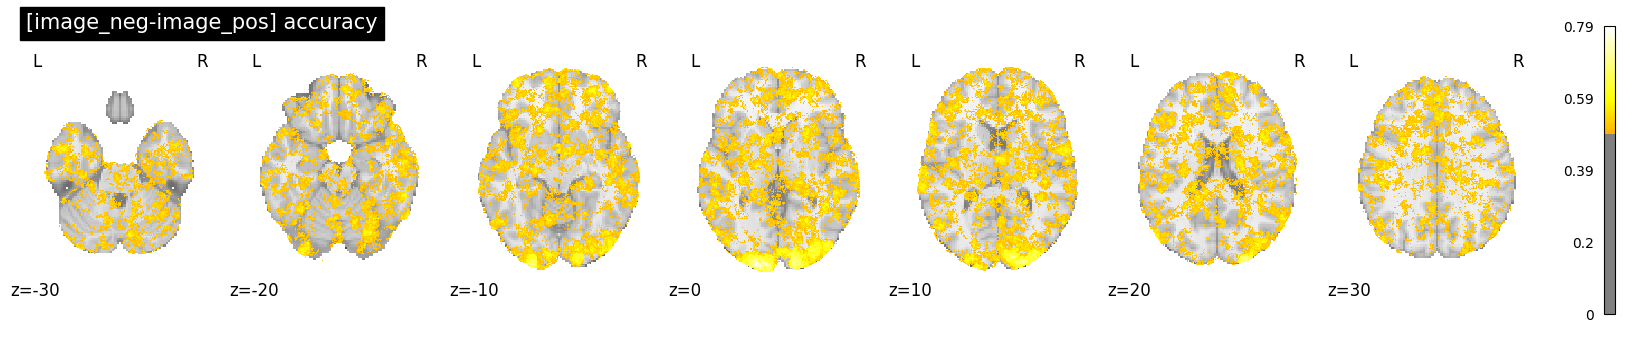

Finishing cell: 19:38:26


In [37]:
# Importing stuff
from nilearn import plotting
from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like
import numpy as np
import matplotlib.pyplot as plt

# Filename
mask_wb_filename='/work/fMRI_data/FaceWordData/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

# Starting
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
print(searchlight_img.shape)

plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub1'),
                              plot_abs=False, display_mode='x')

   
#plt.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

plot_stat_map(searchlight_img, cmap='cold_hot',threshold=0.5, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='[image_neg-image_pos] accuracy')
plt.show()

# Saving the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
#pickle.dump([searchlight_all, searchlight_img], f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Load searchlight maps for each participant


In [38]:
# Loading searchlight maps for each participant
from nilearn.image import new_img_like, math_img

# Number of participants
N_par=21

# Getting an empty list to fill out
searchlight_all= np.empty((N_par, 0)).tolist()
searchlight_all=[]
searchlight_demean=[]

conditions_label_all= np.empty((N_par, 0)).tolist()

# Looping through 
for i in range(0,N_par):
    text = "Loading file %d\n" % (i+1)
    print(text)
    file_name='/work/fMRI_data/FaceWordData/WordFace_searchlight_'+str(i)+'.pkl'
    f = open(file_name, 'rb')
    searchlight = pickle.load(f)
    searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
    searchlight_all.append(searchlight_img)
    searchlight_demean.append(math_img("(img1-0.5)*img2",img1=searchlight_img,img2=mask_wb_filename))
    
    #searchlight_all[i]=searchlight
    f.close()

print(searchlight_all[1])
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Loading file 1

Loading file 2

Loading file 3

Loading file 4

Loading file 5

Loading file 6

Loading file 7

Loading file 8

Loading file 9

Loading file 10

Loading file 11

Loading file 12

Loading file 13

Loading file 14

Loading file 15

Loading file 16

Loading file 17

Loading file 18

Loading file 19

Loading file 20

Loading file 21


<class 'nibabel.nifti1.Nifti1Image'>
data shape (193, 235, 198)
affine:
[[   1.       0.       0.     -96.   ]
 [   0.       0.977    0.    -132.   ]
 [   0.       0.       0.977  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 193 235 198   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0

In [39]:
import numpy as np
import nibabel as nib

# mask_wb_filename is the filepath to the mask image
mask_img = nib.load(mask_wb_filename)
mask_data = mask_img.get_fdata()
mask_bool = mask_data > 0

# searchlight_demean is already a list of Nifti1Image objects
means = []
std_devs = []  # List to store standard deviations
for img in searchlight_demean:
    img_data = img.get_fdata()
    masked_data = img_data[mask_bool]
    mean_value = masked_data.mean()
    std_dev_value = masked_data.std()  # Calculate standard deviation
    means.append(mean_value)
    std_devs.append(std_dev_value)  # Append standard deviation to the list

# Calculate the average mean and standard deviation across all images
average_mean = np.mean(means)
average_std_dev = np.mean(std_devs)
print(f"The average mean across all demeaned images is: {average_mean}")
print(f"The average standard deviation across all demeaned images is: {average_std_dev}")


The average mean across all demeaned images is: -0.01072751802845697
The average standard deviation across all demeaned images is: 0.10236694484887941


In [40]:
searchlight_demean

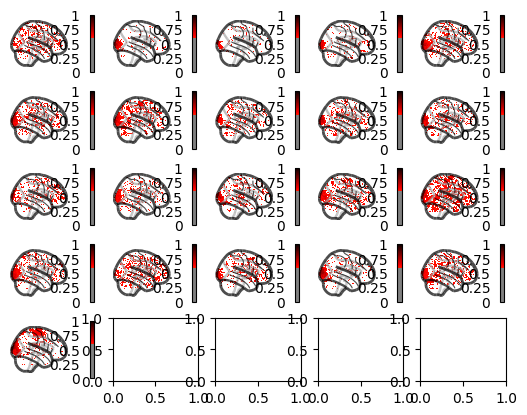

In [41]:
# Import
import matplotlib.pyplot as plt
from nilearn import plotting

#subjects = data["ext_vars"]["participant_id"].tolist()
fig, axes = plt.subplots(nrows=5, ncols=5)
for cidx, map in enumerate(searchlight_all):
    plotting.plot_glass_brain(
        map,
        colorbar=True,
        threshold=0.6,
        vmin=0.5,
        vmax=1,
        title=None,
        axes=axes[int(cidx / 5), int(cidx % 5)],
        plot_abs=False,
        display_mode="x",
    )
plt.show()

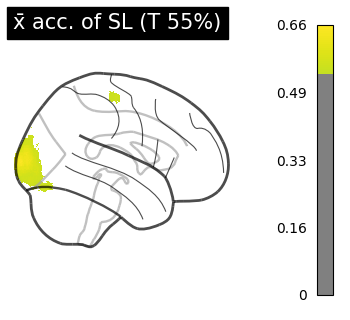

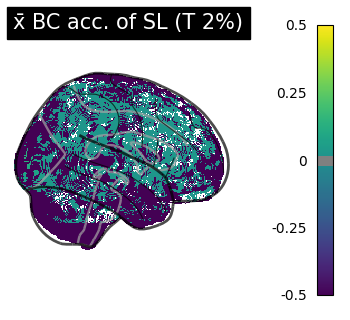

In [42]:
from nilearn.image import new_img_like,  mean_img, concat_imgs

#Concatenate beta maps
searchlight_conc=concat_imgs(searchlight_all)

# Make a mean image
searchlight_mean=mean_img(searchlight_conc)

#Concatenate baseline corrected maps
searchlight_conc_de=concat_imgs(searchlight_demean)

# Make a mean of the baseline-corrected image
searchlight_mean_demean=mean_img(searchlight_conc_de)

# # Accuracies first look
plot_glass_brain(searchlight_mean, 
                cmap='viridis', # changed my colormap from jet
                colorbar=True, 
                threshold=0.55, # vox thres
                title=('x̄ acc. of SL (T 55%)'), # aacross participants
                plot_abs=False, 
                display_mode='x')


#nilearn.plotting.plot_glass_brain(stat_map_img, output_file=None, display_mode='ortho', colorbar=False, cbar_tick_format='%.2g', figure=None, axes=None, title=None, threshold='auto', annotate=True, black_bg=False, cmap=None, alpha=0.7, vmin=None, vmax=None, plot_abs=True, symmetric_cbar='auto', resampling_interpolation='continuous', radiological=False, **kwargs)[source]

# Baseline corrected (used to control for non-task-related variability, adjusting it on some measure)
plot_glass_brain(searchlight_mean_demean, 
                cmap='viridis',
                colorbar=True, 
                threshold=0.02, # more conservative approach to identify sign regions since the data could have become more normalized or centered/changed in some way after baseline corre. effects of interest may be at different scales now.
                vmin=0,
                title=('x̄ BC acc. of SL (T 2%)'), # before 5, across participants, BC = baseline corrected
                plot_abs=False, display_mode='x')


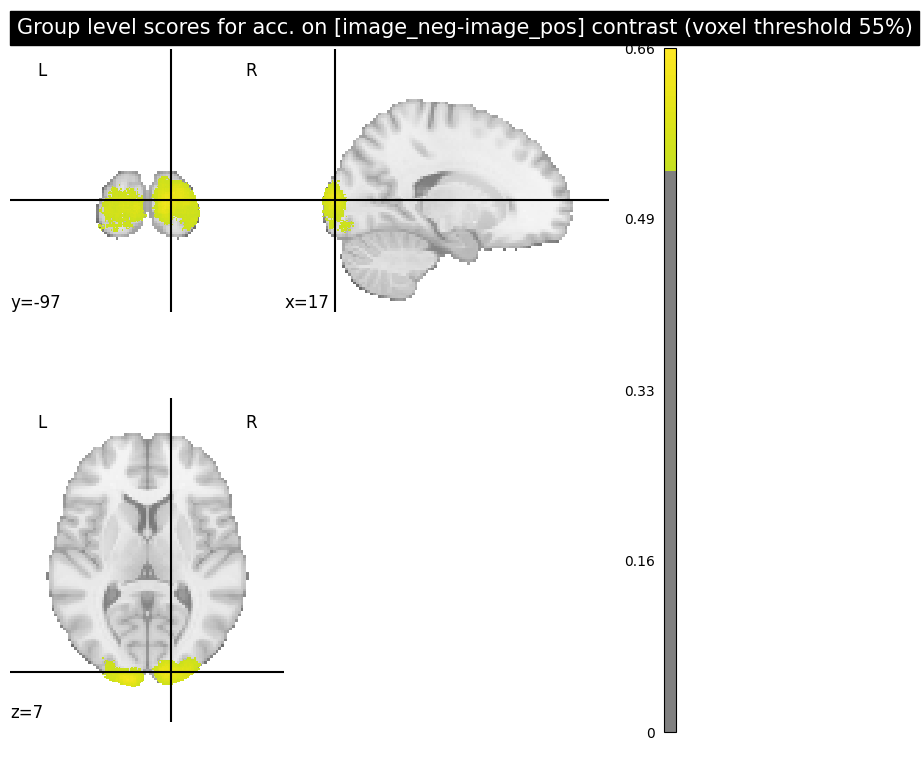

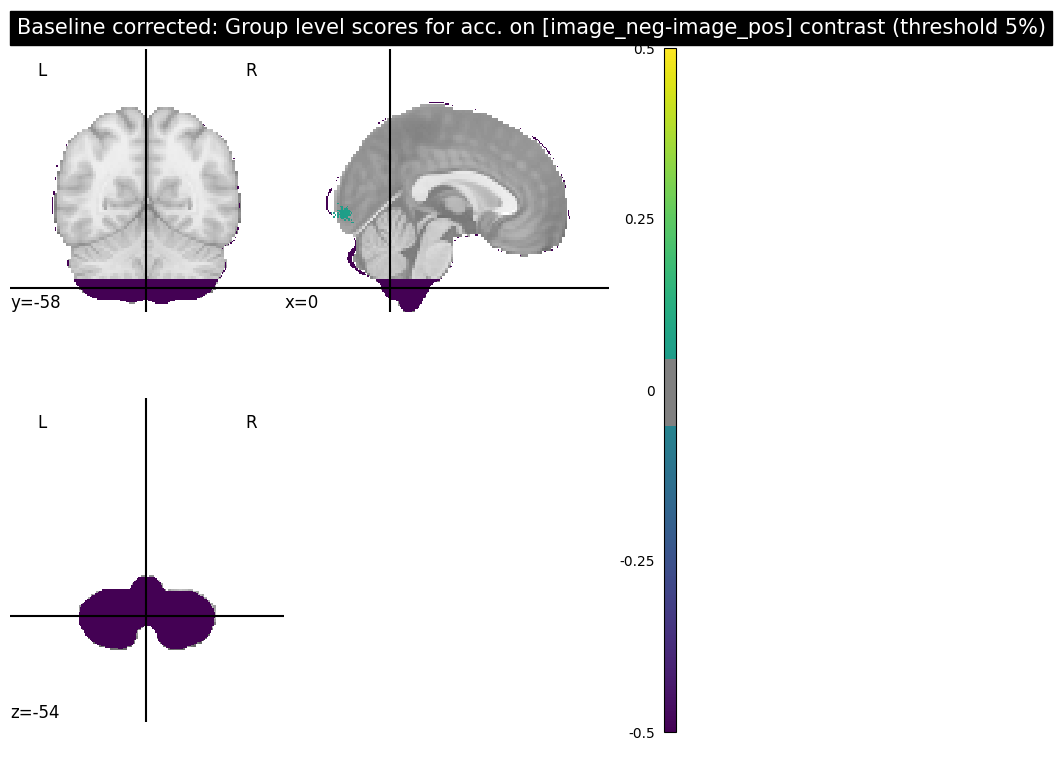

In [43]:
### STAT MAPS
# not baseline corr
plot_stat_map(searchlight_mean, 
cmap='viridis',
threshold=0.55, 
#cut_coords=[-20,-10,0,10,20,30,40],
display_mode='tiled',# 'z',  # showing slices along the z axis
black_bg=False,
title='Group level scores for acc. on [image_neg-image_pos] contrast (voxel threshold 55%)')
plt.show()

# baseline corr
plot_stat_map(searchlight_mean_demean, 
cmap='viridis',
threshold=0.05, 
#cut_coords=[-20,-10,0,10,20,30,40],
display_mode= 'tiled',# 'z', 
black_bg=False,
title='Baseline corrected: Group level scores for acc. on [image_neg-image_pos] contrast (threshold 5%)')
plt.show()

In [44]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

second_level_input = searchlight_demean # just a bunch of nifti images

# Creating the design matrix
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=["intercept"], # Adding intercept
    
)

design_matrix

,intercept
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


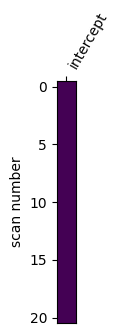

In [45]:
# plott
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix, rescale=False)
plt.tight_layout()
plotting.show()

In [46]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

second_level_input = searchlight_demean

design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=["intercept"], # i think this is here we add intercept for subjects
)

#second_level_model = SecondLevelModel(smoothing_fwhm=6.0, n_jobs=2) # orig smooth - removed now

second_level_model = second_level_model.fit(
    second_level_input,
    design_matrix=design_matrix,
)

z_map = second_level_model.compute_contrast( # Generate different outputs corresponding to the contrasts provided e.g. z_map, t_map, effects and variance.
    second_level_contrast="intercept", 
    output_type="z_score",
)

/home/ucloud/.local/lib/python3.10/site-packages/nilearn/glm/_utils.py:346: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


The p<0.001 threshold is 3.09


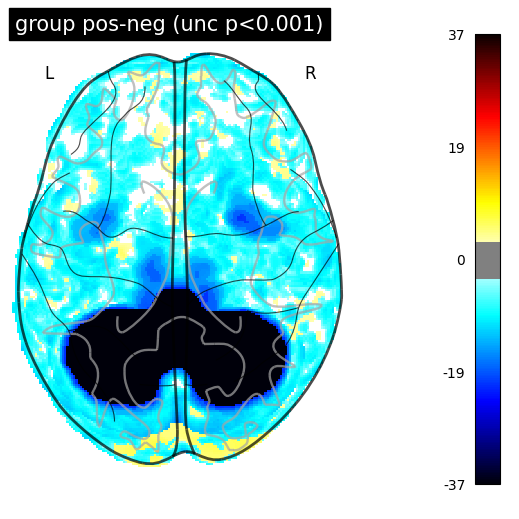

In [47]:
## P VALUE 0.001 ## 

from scipy.stats import norm
# We threshold the second level contrast at uncorrected p < 0.001 and plot it 
p_val = 0.001
p001_unc = norm.isf(p_val)
display = plotting.plot_glass_brain(
    z_map,
    threshold=p001_unc,
    colorbar=True,
    display_mode="z",
    plot_abs=False,
    title="group pos-neg (unc p<0.001)",
    figure=plt.figure(figsize=(5, 5)),
)
print(f"The p<0.001 threshold is {p001_unc:.3g}")
plotting.show()

The p<0.001 threshold is 3.09


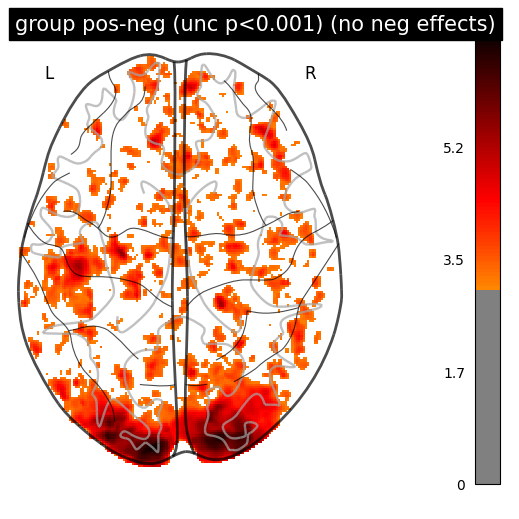

In [48]:
# Same as above but removing the negative effects
from scipy.stats import norm
from nilearn.image import threshold_img

# Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

# We threshold the second level contrast at uncorrected p < 0.001 and plot it 
p_val = 0.001
p001_unc = norm.isf(p_val)
display = plotting.plot_glass_brain(
    z_map_disp,
    threshold= p001_unc,
    colorbar=True,
    display_mode="z",
    plot_abs=False,
    title="group pos-neg (unc p<0.001) (no neg effects)",
    figure=plt.figure(figsize=(5, 5)),
)
print(f"The p<0.001 threshold is {p001_unc:.3g}")
plotting.show()

The FDR=.001 threshold is 3.94


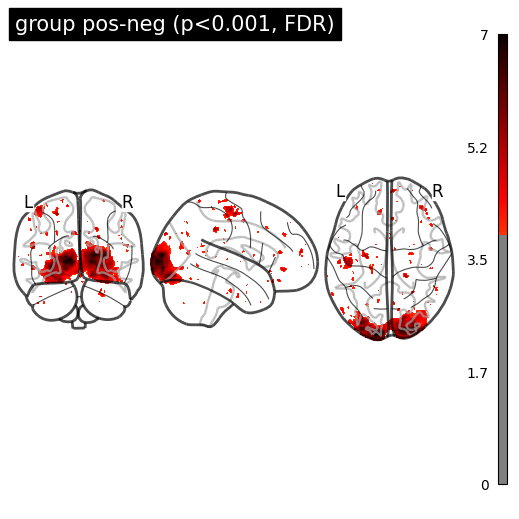

In [49]:
## FDR 0.001 ##
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

# Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

# difference thresholds
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=0.001, height_control="fdr" # making it more stringent
)
print(f"The FDR=.001 threshold is {threshold2:.3g}")

# FDR PLOT
display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold2,
    colorbar=True,
    #vmin=0,
    #vmax=12,
    #display_mode="z",
    plot_abs=False,
    title="group pos-neg (p<0.001, FDR)",
    figure=plt.figure(figsize=(5, 5)),
)

plotting.show()

The p<.05 Bonferroni-corrected threshold is 5.57


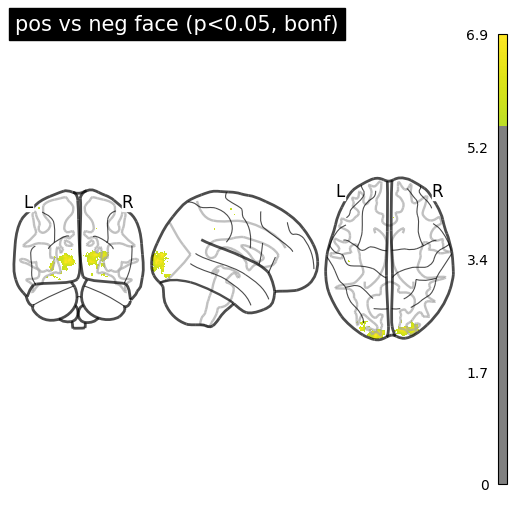

In [102]:
## BONF ##
thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    #vmin=0,
    cmap='viridis',
    #vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, bonf)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

The p<0.001 threshold is 3.09


The FDR=.05 threshold is 2.61
The p<.05 Bonferroni-corrected threshold is 5.57


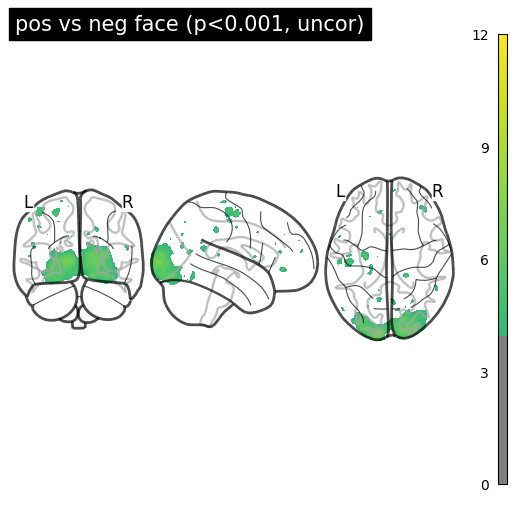

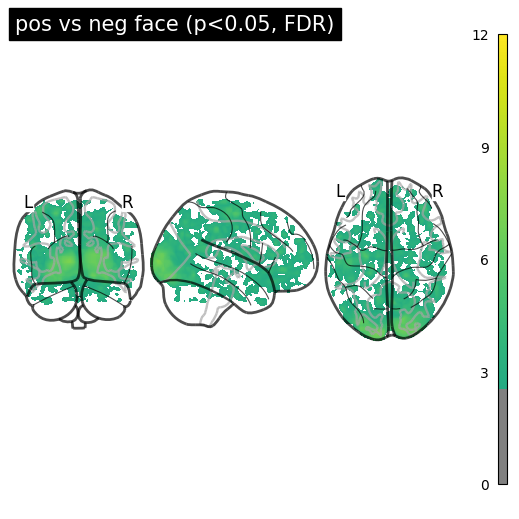

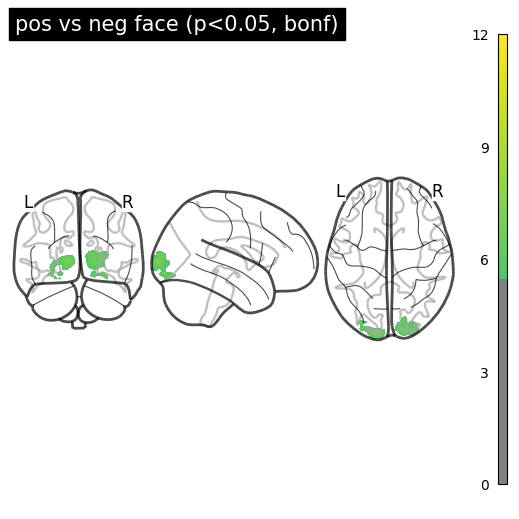

In [ ]:
from scipy.stats import norm
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

# p value
p_val = 0.001
p001_unc = norm.isf(p_val)
print(f"The p<0.001 threshold is {p001_unc:.3g}")

# difference thresholds
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr"
)
print(f"The FDR=.05 threshold is {threshold2:.3g}")

thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")


#Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=4,
    cmap='viridis',
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.001, uncor)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    cmap='viridis',
    threshold=threshold2,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, FDR)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    vmin=0,
    cmap='viridis',
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, bonf)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

The FDR=.001 threshold is 4.25


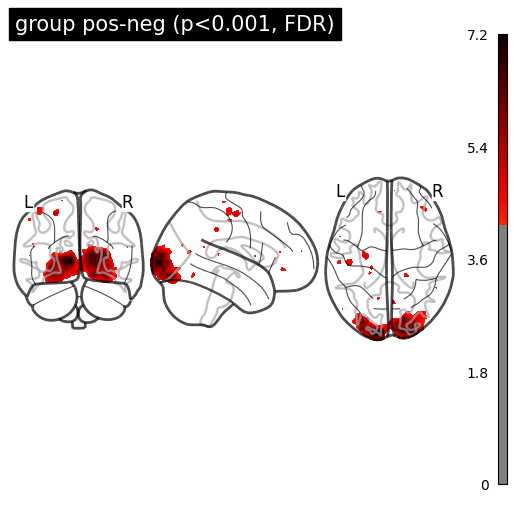

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-11.0,-99.759,3.091,7.221109,31038.419084,Occipital_Sup_L,ctx-lh-lateraloccipital,54.0% Left_Occipital_Pole
1,2.0,-44.0,-20.622,60.734,4.899020,310.221921,Postcentral_L,ctx-lh-postcentral,42.0% Left_Postcentral_Gyrus; 21.0% Left_Prece...
2,3.0,-25.0,-13.783,56.826,5.359658,230.041486,Precentral_L,ctx-lh-precentral,36.0% Left_Precentral_Gyrus; 6.0% Left_Superio...
3,4.0,19.0,-35.277,39.240,5.042569,70.635145,no_label,Right-Cerebral-White-Matter,0% no_label
4,5.0,41.0,38.975,-5.702,4.643068,69.680616,Frontal_Inf_Orb_2_R,Right-Cerebral-White-Matter,14.0% Right_Frontal_Pole
5,6.0,6.0,-65.564,13.838,4.829692,64.907971,Calcarine_R,Right-Cerebral-White-Matter,53.0% Right_Intracalcarine_Cortex; 14.0% Right...
6,7.0,-12.0,-60.679,-11.564,4.867340,52.499094,Cerebelum_6_L,Left-Cerebellum-Cortex,12.0% Left_Lingual_Gyrus
7,8.0,-56.0,-20.622,49.010,4.544023,37.226631,Parietal_Inf_L,ctx-lh-postcentral,72.0% Left_Postcentral_Gyrus
8,9.0,-21.0,-32.346,11.884,4.606593,25.772283,no_label,Left-Thalamus-Proper,9.0% Left_Lateral_Ventrical; 8.0% Left_Thalamus
9,10.0,-10.0,36.044,13.838,4.505701,20.999638,no_label,Unknown,39.0% Left_Cingulate_Gyrus_anterior_division; ...


In [31]:
## c) Using thresholded image for FDR and make a table of sign regions
### TAKING THE FDR CODE AGAIN ## 
## FDR 0.05 / 0.001 ##
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

# Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

# difference thresholds
thresholded_map2, threshold2 = threshold_stats_img(
    z_map_disp, alpha=0.001, height_control="fdr" # just changed z_map_disp to z_map
)
print(f"The FDR=.001 threshold is {threshold2:.3g}")

# FDR PLOT
display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold2,
    colorbar=True,
    #vmin=0,
    #vmax=12,
    #display_mode="z",
    plot_abs=False,
    title="group pos-neg (p<0.001, FDR)",
    figure=plt.figure(figsize=(5, 5)),
)

plotting.show()

## Now, lets use atlasreader
from atlasreader import create_output
create_output(z_map_disp, voxel_thresh=threshold2, cluster_extent=0,direction='pos') # direction pos

# Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
pd.read_csv('atlasreader_peaks.csv')

In [50]:
pd.read_csv('atlasreader_peaks.csv')
# https://github.com/miykael/atlasreader/blob/master/notebooks/atlasreader.ipynb

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-11.0,-99.759,3.091,7.221109,31038.419084,Occipital_Sup_L,ctx-lh-lateraloccipital,54.0% Left_Occipital_Pole
1,2.0,-44.0,-20.622,60.734,4.899020,310.221921,Postcentral_L,ctx-lh-postcentral,42.0% Left_Postcentral_Gyrus; 21.0% Left_Prece...
2,3.0,-25.0,-13.783,56.826,5.359658,230.041486,Precentral_L,ctx-lh-precentral,36.0% Left_Precentral_Gyrus; 6.0% Left_Superio...
3,4.0,19.0,-35.277,39.240,5.042569,70.635145,no_label,Right-Cerebral-White-Matter,0% no_label
4,5.0,41.0,38.975,-5.702,4.643068,69.680616,Frontal_Inf_Orb_2_R,Right-Cerebral-White-Matter,14.0% Right_Frontal_Pole
5,6.0,6.0,-65.564,13.838,4.829692,64.907971,Calcarine_R,Right-Cerebral-White-Matter,53.0% Right_Intracalcarine_Cortex; 14.0% Right...
6,7.0,-12.0,-60.679,-11.564,4.867340,52.499094,Cerebelum_6_L,Left-Cerebellum-Cortex,12.0% Left_Lingual_Gyrus
7,8.0,-56.0,-20.622,49.010,4.544023,37.226631,Parietal_Inf_L,ctx-lh-postcentral,72.0% Left_Postcentral_Gyrus
8,9.0,-21.0,-32.346,11.884,4.606593,25.772283,no_label,Left-Thalamus-Proper,9.0% Left_Lateral_Ventrical; 8.0% Left_Thalamus
9,10.0,-10.0,36.044,13.838,4.505701,20.999638,no_label,Unknown,39.0% Left_Cingulate_Gyrus_anterior_division; ...


The p<.05 Bonferroni-corrected threshold is 5.57


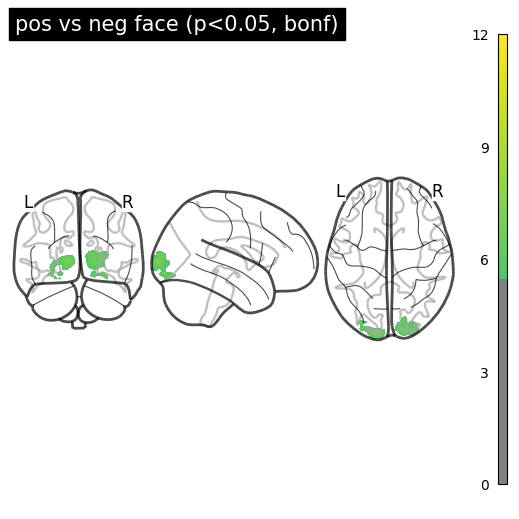

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,17.0,-96.828,9.930,6.598592,3629.119210,Cuneus_R,Right-Cerebral-White-Matter,62.0% Right_Occipital_Pole
1,2.0,-11.0,-99.759,3.091,7.221109,2772.906708,Occipital_Sup_L,ctx-lh-lateraloccipital,54.0% Left_Occipital_Pole
2,3.0,16.0,-86.081,-12.541,6.458666,653.852356,Lingual_R,ctx-rh-lingual,39.0% Right_Occipital_Fusiform_Gyrus; 17.0% Ri...
3,4.0,-21.0,-96.828,-10.587,5.870944,99.271015,Occipital_Inf_L,Left-Cerebral-White-Matter,53.0% Left_Occipital_Pole; 5.0% Left_Lateral_O...
4,5.0,-22.0,-92.920,-16.449,5.637603,5.727174,Lingual_L,Left-Cerebral-White-Matter,41.0% Left_Occipital_Pole; 18.0% Left_Occipita...


In [48]:
# Trying with bonf instead
## c) Using thresholded image for FDR and make a table of sign regions
### BONF CODE AGAIN ## 
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img


thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")


# Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    vmin=0,
    cmap='viridis',
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="pos vs neg face (p<0.05, bonf)",
    figure=plt.figure(figsize=(5, 5)),
)
plotting.show()

## Now, lets use atlasreader
from atlasreader import create_output
create_output(z_map_disp, voxel_thresh=threshold3, cluster_extent=0,direction='pos') # direction pos

# Atlasreader automatically saves results to both .png-files and a csv-file
pd.read_csv('atlasreader_peaks.csv')

In [46]:
# Make a table of cluster coordinates.
from nilearn.reporting import get_clusters_table

table = get_clusters_table(z_map_disp, stat_threshold=threshold3)


In [47]:
print(table)

  Cluster ID     X       Y       Z  Peak Stat Cluster Size (mm3)
0          1 -11.0 -99.759   3.091   7.221110               3631
1         1a -30.0 -94.874  -3.748   6.328039                   
2         1b -31.0 -88.035 -11.564   6.150223                   
3         1c -21.0 -96.828 -10.587   5.870944                   
4          2  17.0 -96.828   9.930   6.598592               5314
5         2a  16.0 -86.081 -12.541   6.458666                   
6         2b  28.0 -96.828   8.953   6.447161                   
7         2c  29.0 -90.966 -13.518   6.101459                   


## Tasks and questions for assignment 5
a) Make a short description of the methods used in the searchlight and group analyses.

b) Consider the different thresholds. Pick one and try to argue for your choice.

c) Use the thresholded image and make a table of the significant regions (e.g. using atlasreader - see notebook 14)

d) Briefly describe the results and discuss the extent to which they are surprising, given the task of observing two emojis and responding with a buttonpress.

e) Include at least one fancy plot.

f) Eye-ball the univariate group analysis of the same data conducted in notebook 14. What is the difference, if any? Does the multivariate analysis tell us something we didn't already know+

g) Smoothing has been applied to the 2nd level analysis. Briefly consider whether this is a good or bad thing, given that multvariate pattern analysis is based on the idea of patterns across voxels (you can also try changing the smoothing level).

h) The t-test approach for group analyses of searchlight analyses has been widely used, but has also been heavily critized (e.g. see Allefeld 2016; Wang et al. 2020). Briefly consider what we could/should have done, if we had had more time. 

Individual assignment. Max. 2 pages, excl. figures and references, code as appendix.

#### References
Allefeld, C., Görgen, K., & Haynes, J.-D. (2016). Valid population inference for information-based imaging: From the second-level t-test to prevalence inference. Neuroimage, 141, 378-392, https://doi.org/10.1016/j.neuroimage.2016.07.040.

Wang, Q., Cagna, B., Chaminade, T., & Takerkart, S. (2020). Inter-subject pattern analysis: A straightforward and powerful scheme for group-level MVPA. Neuroimage, 204, 116205, https://doi.org/10.1016/j.neuroimage.2019.116205.

